In [8]:
using LinearAlgebra, NLsolve, Plots, DataFrames


In [2]:
μ = 0.1

function U(x, y)
    term1 = -(1 - μ) / sqrt((x + μ)^2 + y^2)
    term2 = -μ / sqrt((x - (1 - μ))^2 + y^2)
    term3 = -0.5 * (x^2 + y^2)
    return term1 + term2 + term3
end

x = range(-2, 2, length=400)
y = range(-2, 2, length=400)

-2.0:0.010025062656641603:2.0

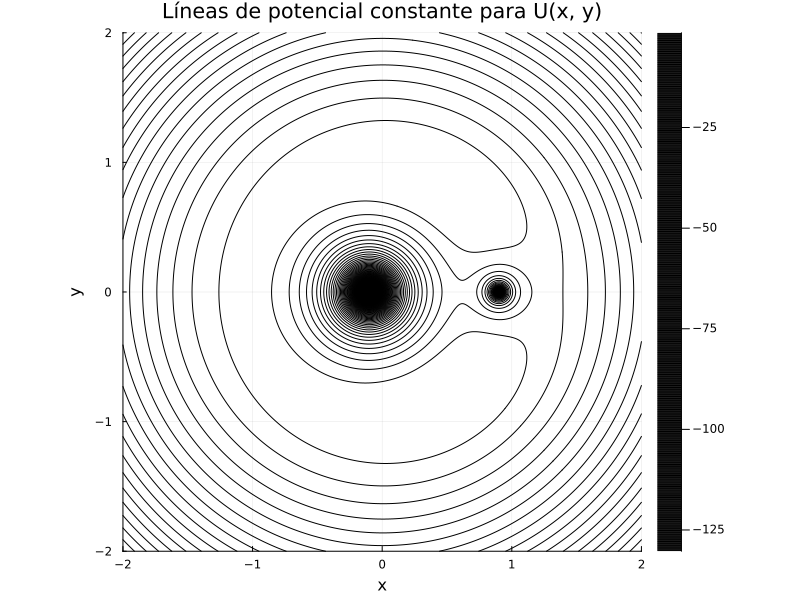

In [3]:
# Calculamos el potencial
Z = [U(xi, yi) for yi in y, xi in x]

contour(x, y, Z, levels=800, color=:black, 
        title="Líneas de potencial constante para U(x, y)",
        xlabel="x", ylabel="y", 
        colorbar=true, 
        aspect_ratio=:equal,
        size=(800, 600),
        xlims=(-2, 2),
        ylims=(-2, 2))

In [4]:
μvals = 0.001:0.001:0.5
nμvals = length(μvals)

# Inicializamos una matriz para almacenar las posiciones 
p_lagrange = zeros(Float64, nμvals, 10)

# Definimos la función que calcula los puntos 
function evalF!(F, X, μ)
    x, y = X
    #x
    F[1] = x - (1 - μ)*(x + μ)/((x + μ)^2 + y^2)^(3/2) - μ*(x + μ - 1)/((x + μ - 1)^2 + y^2)^(3/2)
    #y
    F[2] = y - (1 - μ)*y/((x + μ)^2 + y^2)^(3/2) - μ*y/((x + μ - 1)^2 + y^2)^(3/2)
end

# Definimos posiciones iniciales
initial_positions = [
    [0.0, 0.0],
    [1.0, 0.0],
    [-1.0, 0.0],
    [0.0, 1.0],
    [0.0, -1.0]
]

# Iteramos sobre cada valor de μ
for (i, μ) in enumerate(μvals)
    # Para cada μ, encuentra los cinco puntos de Lagrange
    for (j, pos) in enumerate(initial_positions)
        # Usamos NLsolve para encontrar la solución, comenzando desde la posición inicial
        result = nlsolve((F, X) -> evalF!(F, X, μ), pos, autodiff=:forward)
        # Guarda la solución (punto de Lagrange) en la matriz p_lagrange
        p_lagrange[i, (2j-1):(2j)] = result.zero
    end
end

In [9]:
# Definimos las funciones teóricas para comparación
theoretical_approximations = [
    μ -> 1 - ∛(μ/3),
    μ -> 0,
    μ -> 1 + ∛(μ/3),
    μ -> 0,
    μ -> -1 - 5μ/12,
    μ -> 0,
    μ -> 1/2 - μ,
    μ -> √3/2,
    μ -> 1/2 - μ,
    μ -> -√3/2
]

# Crear una matriz para almacenar los errores
errors = zeros(Float64, length(μvals), 10)

# Calcular los errores absolutos entre los valores numéricos y teóricos
for idx in 1:10
    errors[:, idx] = abs.(p_lagrange[:, idx] .- [theoretical_approximations[idx](μ) for μ in μvals])
end

# Convertir los resultados a un DataFrame para una mejor presentación
df = DataFrame(μ = μvals)

for idx in 1:10
    df[!, "Error L$((idx + 1) ÷ 2) $(idx % 2 == 0 ? "y" : "x")"] = errors[:, idx]
end

In [10]:
df

Row,μ,Error L1 x,Error L1 y,Error L2 x,Error L2 y,Error L3 x,Error L3 y,Error L4 x,Error L4 y,Error L5 x,Error L5 y
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.001,0.000623103,0.0,0.000579971,0.0,5.43887e-11,0.0,0.0,0.0,0.0,0.0
2,0.002,0.000576578,0.0,0.000506424,0.0,4.35418e-10,0.0,0.0,0.0,0.0,0.0
3,0.003,0.000373655,0.0,0.000285368,0.0,1.47002e-9,0.0,0.0,0.0,0.0,0.0
4,0.004,8.24718e-5,0.0,1.72654e-5,0.0,3.48653e-9,0.0,0.0,0.0,0.0,0.0
5,0.005,0.000268551,0.0,0.000374254,0.0,6.81362e-9,0.0,0.0,0.0,0.0,0.0
6,0.006,0.000664079,0.0,0.000771035,0.0,1.17808e-8,0.0,0.0,0.0,0.0,0.0
7,0.007,0.00109464,0.0,0.00119868,0.0,1.87185e-8,0.0,0.0,0.0,0.0,0.0
8,0.008,0.00155384,0.0,0.00165121,0.0,2.79577e-8,0.0,0.0,0.0,0.0,0.0
9,0.009,0.00203714,0.0,0.0021244,0.0,3.98304e-8,0.0,0.0,0.0,0.0,0.0


In [11]:
nuevo_μ = 1/26  

0.038461538461538464

In [11]:
nuevo = zeros(Float64, 10)

for (j, pos) in enumerate(initial_positions)
    result = nlsolve((F, X) -> evalF!(F, X, nuevo_μ), pos, autodiff=:forward)
    nuevo[(2j-1):(2j)] = result.zero
end

println("Puntos de Lagrange para nuevo μ = $nuevo_μ: $(nuevo)")

UndefVarError: UndefVarError: `nuevo_μ` not defined